<a href="https://colab.research.google.com/github/Brandon9627/Deep_Learning/blob/main/CurveFittingTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf
# from tensorflow import keras
# from keras import backend as k
# from keras.models import Sequential
# from keras.layers import Activation
# from keras.layers.core import Dense
# from keras.optimizers import Adam
# from keras.metrics import categorical_crossentropy
import math
import csv
import glob
from PIL import Image
from scipy.interpolate import make_interp_spline
import re

print ('TensorFlow version: ' + tf.__version__)

TensorFlow version: 2.9.2


In [2]:
#loading data
norm_list = []
prob_list = []

with open('NORM.csv', 'r') as file: 
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            norm_list.append(row[0])

with open('PROB.csv', 'r') as file: 
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            prob_list.append(row[0])

norm_list, prob_list = (list(t) for t in zip(*sorted(zip(norm_list, prob_list))))

x_data = np.array(norm_list)
y_data = np.array(prob_list)
x_data = x_data.astype(float)
y_data = y_data.astype(float)

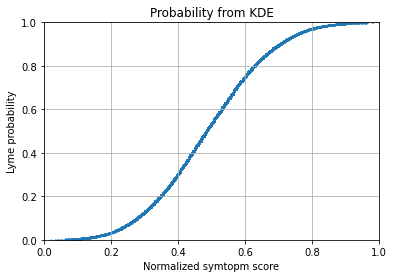

In [3]:
# Display the dataset
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.scatter(x_data[::1], y_data[::1], s=1)
plt.grid()
plt.xlabel('Normalized symtopm score')
plt.ylabel('Lyme probability')
plt.title("Probability from KDE")
plt.show()
# plt.savefig('orgdata.png',dpi=300)
# files.download('orgdata.png') 

In [4]:
#Model Creation
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(tf.keras.layers.Dense(units = 64, input_shape=[1], activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='mse') # , metrics = ['accuracy']

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [5]:

!pwd

/content


In [6]:
# Training
model.fit( x_data, y_data, epochs=100, verbose=1, validation_split=0.2, shuffle=True)
model.save('Qmodel.h5') #Save model for later

#Callbacks
# METRICS = [keras.metrics.BinaryAccuracy(name='accuracy')]
# base_learning_rate = 0.0001
# model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#           loss=tf.keras.losses.BinaryCrossentropy(),
#           metrics=METRICS)
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1)
# csv_logger = CSVLogger(os.path.join(MODEL_SAVE_DIRECTORY,"model_history_log_fold"+str(i)+".csv"), append=True)
# history_bef_finetune = model.fit(train_dataset, epochs=MAX_EPOCH, validation_data=validation_dataset, callbacks=[early_stopping, reduce_lr, csv_logger])

Epoch 1/100
308/308 [==============================] - 4s 3ms/step - loss: 0.0192 - val_loss: 4.2531e-04
Epoch 2/100
308/308 [==============================] - 1s 3ms/step - loss: 1.3172e-04 - val_loss: 4.0701e-04
Epoch 3/100
308/308 [==============================] - 1s 3ms/step - loss: 8.7218e-05 - val_loss: 3.7767e-04
Epoch 4/100
308/308 [==============================] - 1s 3ms/step - loss: 5.1248e-05 - val_loss: 2.8005e-04
Epoch 5/100
308/308 [==============================] - 1s 3ms/step - loss: 4.5458e-05 - val_loss: 2.8292e-04
Epoch 6/100
308/308 [==============================] - 1s 3ms/step - loss: 4.1991e-05 - val_loss: 3.0606e-04
Epoch 7/100
308/308 [==============================] - 1s 3ms/step - loss: 3.7797e-05 - val_loss: 2.5270e-04
Epoch 8/100
308/308 [==============================] - 1s 3ms/step - loss: 3.3992e-05 - val_loss: 2.8852e-04
Epoch 9/100
308/308 [==============================] - 1s 3ms/step - loss: 3.0174e-05 - val_loss: 3.4379e-04
Epoch 10/100
308/308 [=

384/384 [==============================] - 1s 1ms/step


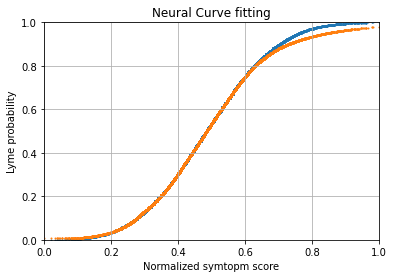

In [7]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.scatter(x_data[::1], y_data[::1], s=1)
plt.scatter(x_data[::1], y_predicted[::1], s=1)
plt.xlabel('Normalized symtopm score')
plt.ylabel('Lyme probability')
plt.title("Neural Curve fitting")
plt.grid()
plt.show()
# plt.savefig('training.png', dpi=300)
# files.download("training.png") 

In [8]:
#predict on arbitraty data
norm_score=0.9
y_predicted = model.predict([norm_score])
print(y_predicted)

1/1 [==============================] - 0s 51ms/step
[[0.9638865]]


In [9]:
#Create GIF of the training performance
# Create the model 
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(tf.keras.layers.Dense(units = 64, input_shape=[1], activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(loss='mse', optimizer="adam")

for x in range(100):
  # One epoch
  model.fit( x_data[100::500], y_data[100::500], epochs=1, verbose=1)

  # Compute the output 
  y_predicted = model.predict(x_data[100::500])

  X_Y_Spline = make_interp_spline(x_data[100::500], y_predicted[::1])
  X_ = np.linspace(x_data[100::500].min(), x_data[100::500].max(), 500)
  Y_ = X_Y_Spline(X_)
  # Display the result
  plt.scatter(x_data[100::500], y_data[100::500], s=3)
  curve = plt.plot(X_, Y_)
  plt.setp(curve, color='r', linewidth=1.0)
  plt.grid()
  plt.xlim(0, 1)
  plt.ylim(0, 1)
  plt.xlabel('Normalized symtopm score')
  plt.ylabel('Lyme probability')
  
  # displaying the title
  plt.title("Neural Curve fitting Epoch: "+str(x))
  #plt.show()
  plt.savefig('/content/training4/'+ str(x) ,dpi=300)
  # files.download('training-' + str(x) +'-epochs.png') 
  plt.clf()

# filepaths
fp_in = "/content/training4/*.png"
fp_out = "curve_fitting_sig2.gif"

natsort = lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split('(\d+)', s)]

# # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in), key=natsort)]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)

1/1 [==============================] - 0s 12ms/step


<Figure size 432x288 with 0 Axes>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section